In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import shutil

# Define the source directory and destination subfolders
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")  # Replace with path containing all images
destination_dir = "dataset"  # Root directory with subfolders healthy/stressed/diseased

# Create subdirectories if they don't exist
categories = ["healthy", "stressed", "diseased"]
for category in categories:
    os.makedirs(os.path.join(destination_dir, category), exist_ok=True)

# Iterate through all files in the source directory
for filename in os.listdir(image_dir ):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Ensure it's an image
        # Logic to sort into categories based on filename (customize as needed)
        if "healthy" in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(destination_dir, "healthy", filename))
        elif "stressed" in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(destination_dir, "stressed", filename))
        elif "diseased" in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(destination_dir, "diseased", filename))

print("Files have been categorized into respective subfolders.")


Files have been categorized into respective subfolders.


In [3]:
import cv2
import os
# Specify the path to the Kaggle dataset
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")   # Update with the actual dataset path


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Function to load and preprocess images from directories
def load_images_and_extract_features(image_dir, image_size=(64, 64)):
    X = []
    y = []
    # Map class labels to integers
    class_mapping = {'healthy': 0, 'stressed': 1, 'diseased': 2}
    
    # Iterate over each category directory
    for class_name, class_id in class_mapping.items():
        class_path = os.path.join(image_dir, class_name)
        if os.path.exists(class_path):  # Ensure path exists
            for filename in os.listdir(class_path):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    image_path = os.path.join(class_path, filename)
                    # Read and resize image
                    image = cv2.imread(image_path)
                    if image is not None:
                        image = cv2.resize(image, image_size)
                        X.append(image.flatten())  # Flatten image into a single row
                        y.append(class_id)  # Append the target class
        else:
            print(f"Warning: Directory {class_path} does not exist.")
    
    # Convert lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)
    
    print(f"Loaded {len(y)} samples.")
    return X, y

In [6]:
# Set directory path to your dataset
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")


In [7]:
# Load the data
print("Loading images and extracting features...")
X, y = load_images_and_extract_features(image_dir)

Loading images and extracting features...
Loaded 296 samples.


In [8]:
import os
print("Current directory:", os.getcwd())


Current directory: C:\Users\Asus


In [9]:
import os

# Debugging: List contents of the directory to check
print("Checking directory contents...")
print(os.listdir(image_dir))


Checking directory contents...
['diseased', 'healthy', 'stressed']


In [10]:
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")
print("Loading dataset...")
X, y = load_images_and_extract_features(image_dir)

# Debugging: Check if X and y are populated
if len(y) == 0 or len(X) == 0:
    raise ValueError("No data was loaded. Please check the image directory and paths.")
else:
    print("Data successfully loaded. Proceeding...")


Loading dataset...
Loaded 296 samples.
Data successfully loaded. Proceeding...


In [11]:
# Split the data into train and test sets
print("Splitting dataset...")
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Train set size: {len(y_train)}")
    print(f"Test set size: {len(y_test)}")
except Exception as e:
    print(f"Error during train-test split: {e}")
    raise

Splitting dataset...
Train set size: 236
Test set size: 60


In [12]:
# Train the Naive Bayes model
print("Training Naive Bayes classifier...")
model = GaussianNB()
model.fit(X_train, y_train)

Training Naive Bayes classifier...


GaussianNB()

In [13]:
# Test the model
print("Evaluating on test data...")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Evaluating on test data...
Test Accuracy: 0.9333333333333333


In [14]:
# Step 5: Evaluate the Model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       1.00      0.67      0.80         6
           2       0.96      0.98      0.97        47

    accuracy                           0.93        60
   macro avg       0.90      0.83      0.86        60
weighted avg       0.94      0.93      0.93        60


Confusion Matrix:
 [[ 6  0  1]
 [ 1  4  1]
 [ 1  0 46]]


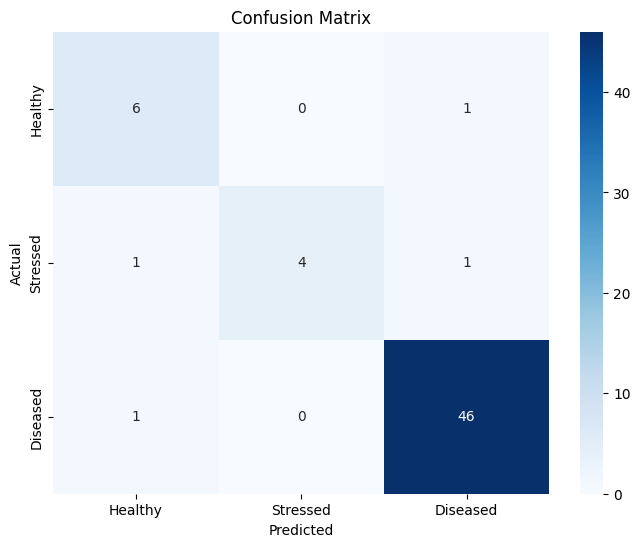

In [15]:
# Step 6: Visualize Results
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Stressed', 'Diseased'], yticklabels=['Healthy', 'Stressed', 'Diseased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Print actual test values
print("Actual values (y_test):")
print(y_test)

# Print predicted test values
print("\nPredicted values (y_pred):")
print(y_pred)


Actual values (y_test):
[2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 0 2 0 2 2 2 0 0 2 0 1 2 2 2]

Predicted values (y_pred):
[2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 0 2 0 2 2 2 2 0 2 0 1 2 2 2]


In [17]:
print("Checking test data features:")
print(X_test[:5])  # Inspect the first few rows of test data


Checking test data features:
[[ 79 135 116 ... 153 152 156]
 [ 69  64  79 ... 100  85  93]
 [117  80  96 ...  25  23  42]
 [ 40  63  52 ... 142 135 142]
 [ 68  60  68 ... 154 146 157]]


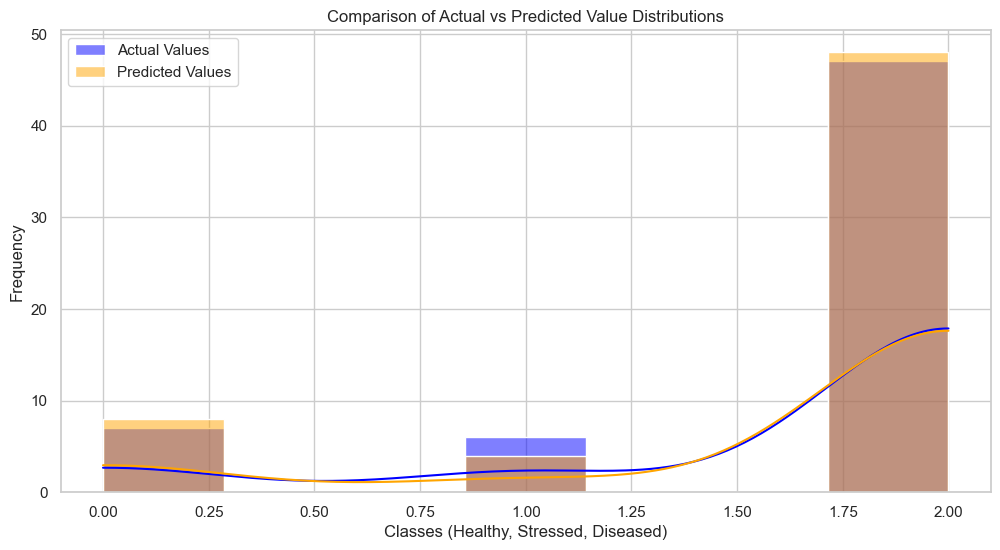

In [18]:
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for actual values
sns.histplot(y_test, color='blue', label="Actual Values", alpha=0.5, kde=True)

# Histogram for predicted values
sns.histplot(y_pred, color='orange', label="Predicted Values", alpha=0.5, kde=True)

# Add legend, labels, and title
plt.legend()
plt.xlabel("Classes (Healthy, Stressed, Diseased)")
plt.ylabel("Frequency")
plt.title("Comparison of Actual vs Predicted Value Distributions")

# Show the plot
plt.show()

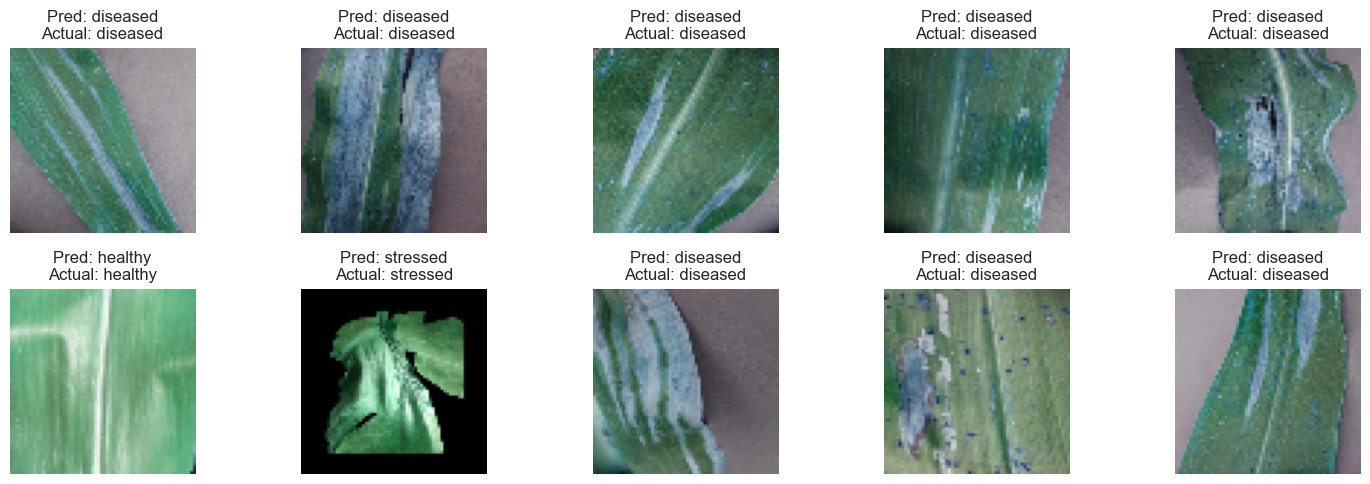

In [19]:
import matplotlib.pyplot as plt

# Function to visualize images and predictions
def visualize_predictions(X_test, y_test, y_pred, class_mapping, num_samples=10):
    """
    Visualize sample images and their predictions.
    
    Args:
        X_test: Test features (numpy array).
        y_test: Actual labels for the test data.
        y_pred: Predicted labels by the trained model.
        class_mapping: Dictionary mapping class indices to names.
        num_samples: Number of samples to visualize.
    """
    # Set up the plotting
    plt.figure(figsize=(15, 5))
    
    # Randomly select images to visualize
    indices = range(min(num_samples, len(X_test)))
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples // 2, i + 1)
        
        # Reshape the flattened image back to 2D (e.g., 64x64)
        image = X_test[idx].reshape(64, 64, 3)
        
        # Display the image
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        
        # Set the title to show predicted vs actual
        plt.title(
            f"Pred: {class_mapping[y_pred[idx]]}\nActual: {class_mapping[y_test[idx]]}"
        )
    
    plt.tight_layout()
    plt.show()


# Create a mapping from label index to class name
class_mapping = {0: 'healthy', 1: 'stressed', 2: 'diseased'}

# Visualize predictions
visualize_predictions(X_test, y_test, y_pred, class_mapping, num_samples=10)


In [20]:
#Debugging Tips
# Confirm X_test contains valid data by printing its shape:
print(X_test.shape)


(60, 12288)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# X, y = load_images_and_extract_features(image_dir)  # Uncomment for real data
if 'X' not in locals() or 'y' not in locals():
    np.random.seed(42)  # For reproducibility
    X = np.random.rand(100, 5)  # 100 samples, 5 features
    y = np.random.rand(100) * 100  # 100 continuous crop health values (scale 0-100)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# Initialize the Linear Regression model
model = LinearRegression()



In [25]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Model Performance Metrics:
Mean Squared Error (MSE): 0.2392737327589742
R-squared (R2): 0.4747649768705444


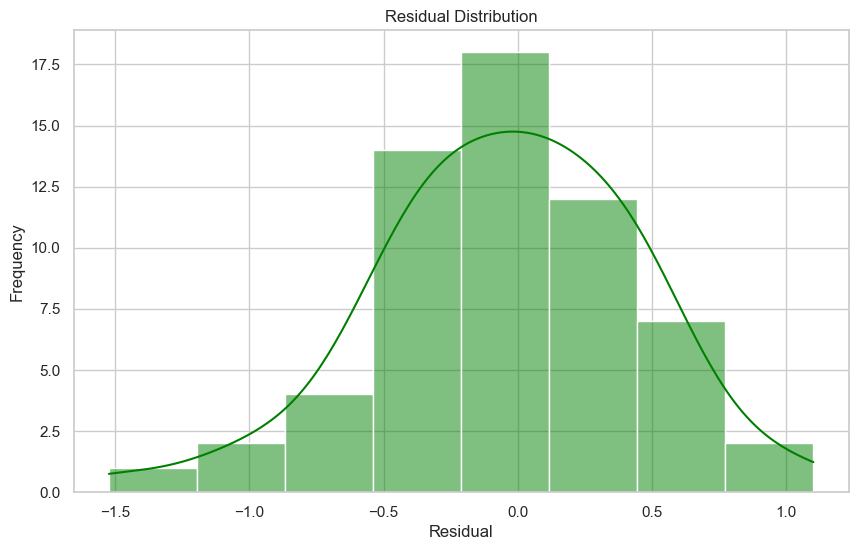

In [28]:
# Plot histogram for residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

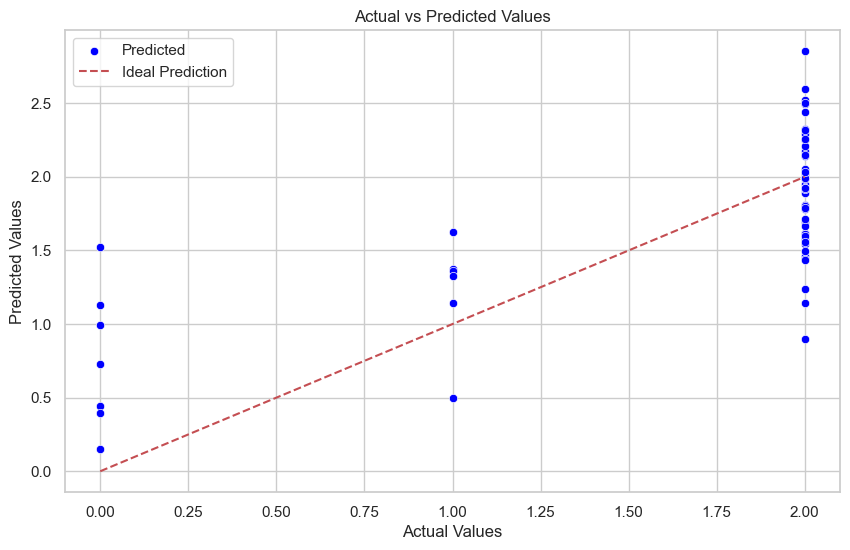

In [29]:
# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [30]:
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.metrics import classification_report, accuracy_score

In [31]:
svm_model = SVC(kernel='linear', random_state=42)

In [32]:
# Step 2: Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [33]:
# Step 3: Make predictions
y_pred_svm = svm_model.predict(X_test)

In [34]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")

SVM Model Accuracy: 0.95


In [35]:
# Detailed classification report
print("\nClassification Report for SVM Model:")
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      0.83      0.91         6
           2       0.96      1.00      0.98        47

    accuracy                           0.95        60
   macro avg       0.93      0.85      0.89        60
weighted avg       0.95      0.95      0.95        60



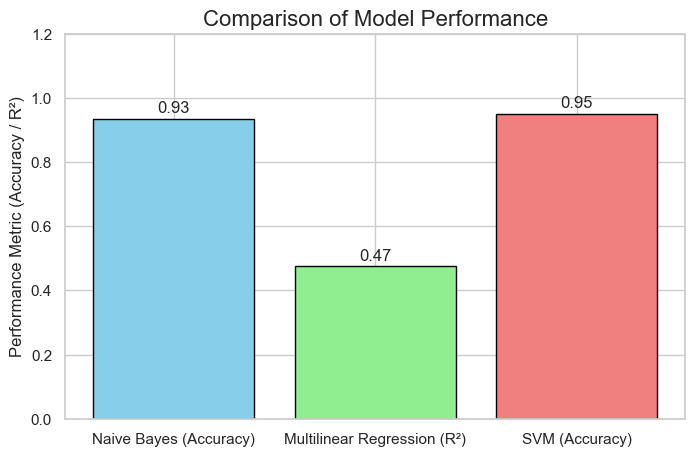

In [36]:
# Extend comparison
models = ['Naive Bayes (Accuracy)', 'Multilinear Regression (R²)', 'SVM (Accuracy)']
scores = [accuracy, r2, svm_accuracy]

# Visualization (Bar Chart)
plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')

# Add value annotations
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=12)

plt.title("Comparison of Model Performance", fontsize=16)
plt.ylabel("Performance Metric (Accuracy / R²)", fontsize=12)
plt.ylim(0, 1.2)
plt.show()


In [37]:
import tensorflow as tf
print(tf.__version__)  # This will print the TensorFlow version


2.18.0


In [43]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models 

In [44]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    image_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_data = datagen.flow_from_directory(
    image_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Extract features from CNN model (using CNN feature extractor)
cnn_model = models.Sequential([  # Ensure models.Sequential is called correctly here
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='softmax')  # Reduce to a small number to avoid overfitting (feature layer)
])


Found 17925 images belonging to 3 classes.
Found 4479 images belonging to 3 classes.


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Extract features from training and validation images
train_features = cnn_model.predict(train_data, verbose=1)
val_features = cnn_model.predict(val_data, verbose=1)

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 35s 62ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step


In [46]:
# SVM Classifier
svm_model = SVC()
svm_model.fit(train_features, train_data.classes)
svm_predictions = svm_model.predict(val_features)

In [47]:
# Naive Bayes Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(train_features, train_data.classes)
naive_bayes_predictions = naive_bayes_model.predict(val_features)

In [48]:
# Linear Regression Model (multilinear regression for classification task)
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_features, train_data.classes)
linear_regression_predictions = linear_regression_model.predict(val_features)


In [49]:
# Calculate accuracies of each model
svm_accuracy = accuracy_score(val_data.classes, svm_predictions)
naive_bayes_accuracy = accuracy_score(val_data.classes, naive_bayes_predictions)
linear_regression_accuracy = accuracy_score(val_data.classes, np.round(linear_regression_predictions))  # Round predictions to nearest class


In [50]:
# Print accuracies
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy * 100:.2f}%")
print(f"Linear Regression Accuracy: {linear_regression_accuracy * 100:.2f}%")


SVM Accuracy: 60.04%
Naive Bayes Accuracy: 59.39%
Linear Regression Accuracy: 1.72%


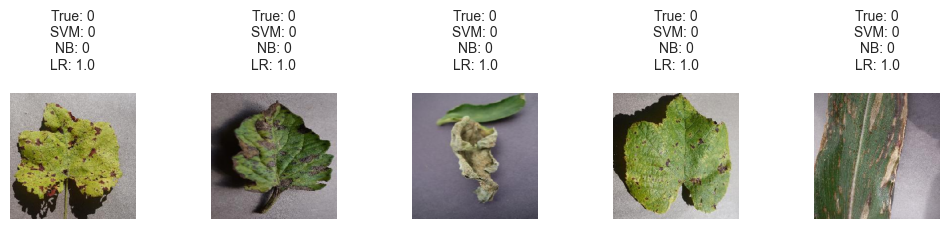

In [51]:
plt.figure(figsize=(12, 10))  # Increase the figsize for more vertical space
for i in range(5):
    plt.subplot(1, 5, i+1)
    image = val_data[i][0][0]  # Getting the i-th image
    plt.imshow(image)
    
    true_label = val_data.classes[i]
    svm_pred = svm_predictions[i]
    nb_pred = naive_bayes_predictions[i]
    lr_pred = np.round(linear_regression_predictions[i])
    
    # Adjust the title with better padding and spacing
    plt.title(
        f"True: {true_label}\nSVM: {svm_pred}\nNB: {nb_pred}\nLR: {lr_pred}",
        fontsize=10,
        pad=15,  # Increase padding between the image and title
        verticalalignment='bottom'  # Align vertically bottom to give more room
    )
    plt.axis('off')

# Add extra space between subplots
plt.subplots_adjust(wspace=0.6, hspace=0.3)  # Increase space both horizontally and vertically
plt.show()